In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 讀取數據
train = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\氣提.csv") 

print (train)
train.head(5)



      Days    pH  Temp CH4 concentration (%)  Infulent VS  \
0      0.0  6.99  35.0                     -          NaN   
1      1.0  7.30  35.0                   59%        12.47   
2      2.0  7.27  35.0                   63%        12.47   
3      3.0  7.28  35.0                   56%        12.47   
4      4.0  7.22  35.0                   59%        12.47   
..     ...   ...   ...                   ...          ...   
223  223.0  7.40  35.0                   68%        14.43   
224  224.0  7.38  35.0                   70%        14.43   
225  225.0  7.39  24.0                   73%        14.43   
226  226.0  7.34  35.0                   68%        14.43   
227    NaN   NaN   NaN                   NaN          NaN   

     Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0                    NaN                 NaN        NaN        NaN   
1                    NaN                 NaN        NaN        NaN   
2                 108.97               16.41      13.05  

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0.0,6.99,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1.0,7.30,35.0,59%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.37,149.0,0.63,251.0
2,2.0,7.27,35.0,63%,12.47,108.97,16.41,13.05,70.66,35.0,...,28.02,17.5,62%,74.0,73.0,2.17,0.12,47.0,0.19,74.0
3,3.0,7.28,35.0,56%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.13,52.0,0.23,93.0
4,4.0,7.22,35.0,59%,12.47,108.97,16.41,14.82,58.58,46.0,...,29.13,17.8,61%,73.0,73.0,2.17,0.12,47.0,0.20,79.0


In [3]:
test = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\無氣提.csv")

print (test)
test.head(5)

     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  7.03  35.0                     -          NaN                  NaN   
1       1  7.08  35.0                   43%        12.47                  NaN   
2       2  7.22  35.0                   53%        12.47               108.97   
3       3  7.22  35.0                   50%        12.47                  NaN   
4       4  7.24  35.0                   49%        12.47               108.97   
..    ...   ...   ...                   ...          ...                  ...   
223   223  7.29  34.0                   70%        14.43               128.50   
224   224  7.15  35.0                   68%        14.43                  NaN   
225   225  7.31  35.0                   69%        14.43               128.50   
226   226  7.29  35.0                   69%        14.43                  NaN   
227   227   NaN   NaN                   NaN          NaN                  NaN   

     Influent SCOD(g/L)  SC

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,7.03,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-,NaN,NaN
1,1,7.08,35.0,43%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.27,107,0.63,251.0
2,2,7.22,35.0,53%,12.47,108.97,16.41,16.41,74.94,31.0,...,60.37,40.57,67%,44.0,38.0,2.17,0.26,106,0.50,202.0
3,3,7.22,35.0,50%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.23,91,0.45,181.0
4,4,7.24,35.0,49%,12.47,108.97,16.41,17.33,61.65,43.0,...,47.85,30.82,64%,56.0,53.0,2.17,0.16,66,0.33,134.0


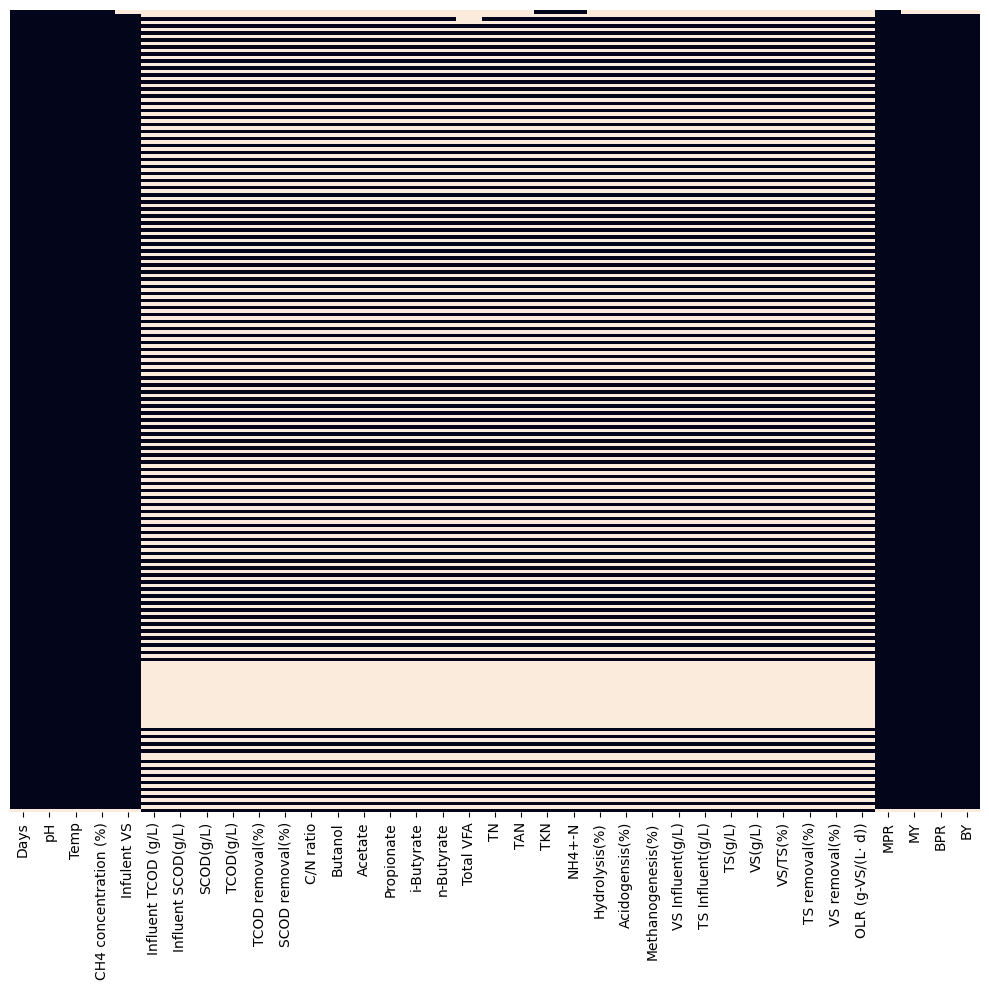

In [83]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [84]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(228, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   227 non-null    float64
 1   pH                     227 non-null    float64
 2   Temp                   227 non-null    float64
 3   CH4 concentration (%)  227 non-null    object 
 4   Infulent VS            226 non-null    float64
 5   Influent TCOD (g/L)    104 non-null    float64
 6   Influent SCOD(g/L)     104 non-null    float64
 7   SCOD(g/L)              104 non-null    float64
 8   TCOD(g/L)              104 non-null    float64
 9   TCOD removal(%)        104 non-null    float64
 10  SCOD removal(%)        104 non-null    float64
 11  C/N ratio              104 non-null    float64
 12  Butanol                104 non-null    float64
 13  Acetate                104 non-null    float64
 14  Propionate             104 non-null    float64
 

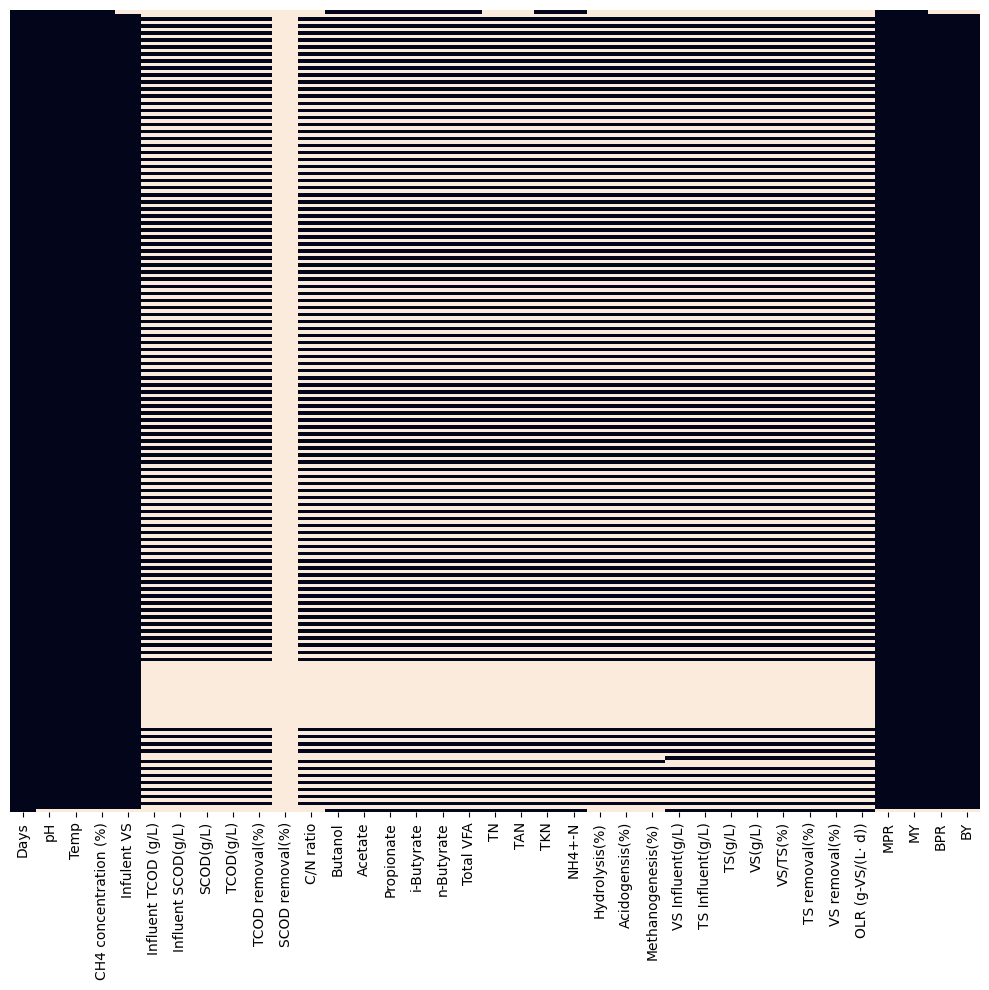

In [85]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [86]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(228, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   228 non-null    int64  
 1   pH                     227 non-null    float64
 2   Temp                   227 non-null    float64
 3   CH4 concentration (%)  227 non-null    object 
 4   Infulent VS            226 non-null    float64
 5   Influent TCOD (g/L)    103 non-null    float64
 6   Influent SCOD(g/L)     103 non-null    float64
 7   SCOD(g/L)              103 non-null    float64
 8   TCOD(g/L)              103 non-null    float64
 9   TCOD removal(%)        103 non-null    float64
 10  SCOD removal(%)        0 non-null      float64
 11  C/N ratio              103 non-null    float64
 12  Butanol                105 non-null    float64
 13  Acetate                105 non-null    float64
 14  Propionate             105 non-null    float64
 

In [87]:
print(train.columns)
print(test.columns)

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')
Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influe

In [88]:
# 轉換這一列的數據類型為數字
train["MY"] = pd.to_numeric(train["MY"], errors='coerce')
test["MY"] = pd.to_numeric(test["MY"], errors='coerce')

train["VS/TS(%)"] = pd.to_numeric(train["VS/TS(%)"], errors='coerce')
test["VS/TS(%)"] = pd.to_numeric(test["VS/TS(%)"], errors='coerce')

train["CH4 concentration (%)"] = pd.to_numeric(train["CH4 concentration (%)"], errors='coerce')
test["MCH4 concentration (%)"] = pd.to_numeric(test["CH4 concentration (%)"], errors='coerce')

In [62]:
# 其餘ND值用前後平均填充(線性插值)
train = train.replace("ND", pd.NA)
test = test.replace("ND" , pd.NA)

# 將百分比轉換為數值
percentage_cols = ["SCOD removal(%)", "TCOD removal(%)", "C/N ratio", "Hydrolysis(%)", "Acidogensis(%)", "Methanogenesis(%)", "VS/TS(%)", "TS removal(%)", "VS removal(%)"]
for col in percentage_cols:
    # 確保所有值為字串型態
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    # 如果該值為數字，將其轉換為浮點數；如果不是，將 "%" 字符去掉並轉換為浮點數
    train[col] = train[col].apply(lambda x: float(x) if x.isdigit() else float(x.rstrip("%")) / 100.0)
    test[col] = test[col].apply(lambda x: float(x) if x.isdigit() else float(x.rstrip("%")) / 100.0)

# # 處理ND值，如果某個特徵有連續20個ND，就刪除該特徵
# features_to_drop = [column for column in train.columns if (train[column] == "ND").rolling(window=10).sum().max() >= 20]
# train = train.drop(columns=features_to_drop)

# 使用前後的值加總除以2進行插值
train = train.interpolate(method="linear")
test = test.interpolate(method="linear")

# 使用線性插值填充缺失值
train = train.interpolate(method="linear", limit_direction="both")
test = test.interpolate(method="linear", limit_direction="both")



In [61]:
print(test['MY'].head())  # 查看前5行
print(test['MY'].tail())  # 查看後5行


0      -
1    107
2    106
3     91
4     66
Name: MY, dtype: object
223    195
224    188
225    182
226    156
227    NaN
Name: MY, dtype: object


In [78]:

# 使用線性插值來填充缺失的值
train["MY"] = train["MY"].interpolate(method="linear", limit_direction="both")
test["MY"] = test["MY"].interpolate(method="linear", limit_direction="both")

# train["CH4 concentration (%)"] = train["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")
# test["CH4 concentration (%)"] = test["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")


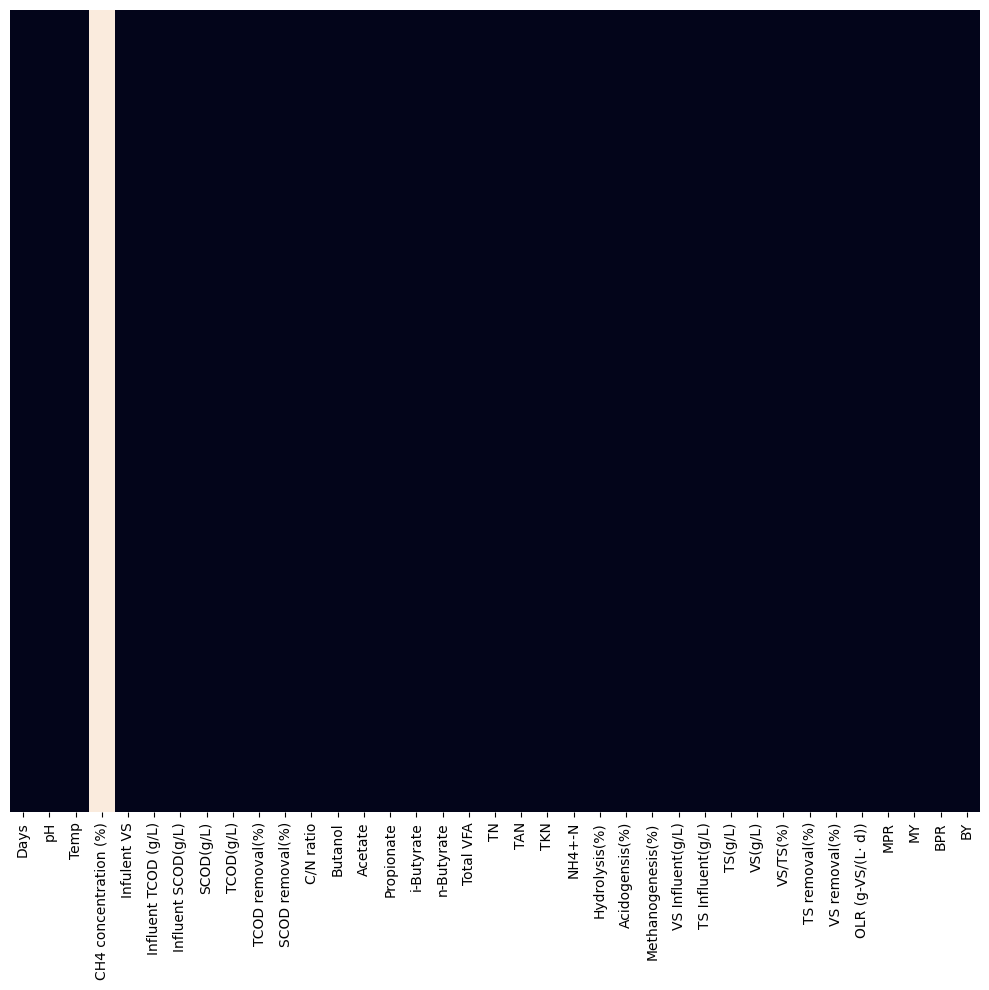

In [79]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

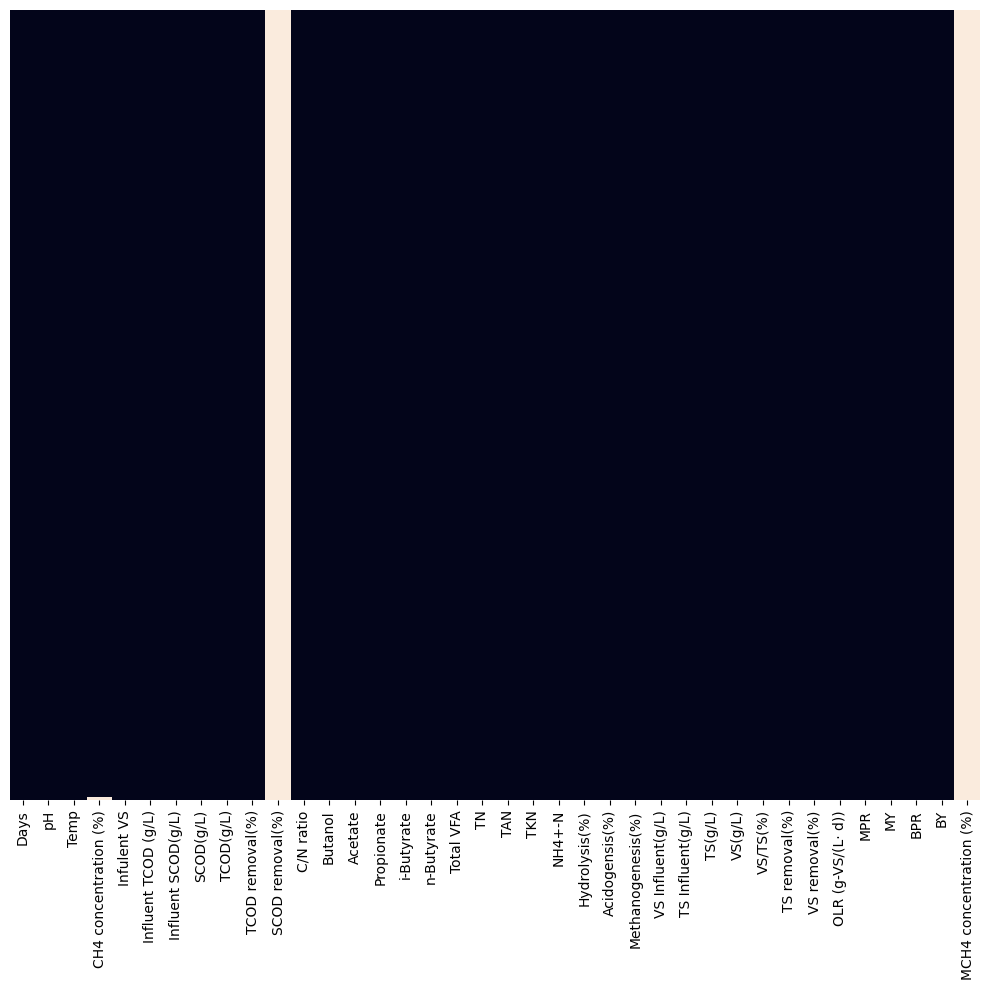

In [80]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [68]:
print(test['MY'].head())  # 查看前5行
print(test['MY'].tail())  # 查看後5行


0    107.0
1    107.0
2    106.0
3     91.0
4     66.0
Name: MY, dtype: float64
223    195.0
224    188.0
225    182.0
226    156.0
227    156.0
Name: MY, dtype: float64


In [ ]:
# 確定目標變量和特徵變量
targets = ["MPR", "MY", "BPR", "BY"]
features = [col for col in train.columns if col not in targets]